Скачайте материалы к занятию. Проанализируйте ряды, сделайте их стационарными.

In [1]:
import pandas as pd
import numpy as np
from statsmodels.tsa.stattools import adfuller
import statsmodels.api as sm
import statsmodels.tsa.api as smt
from statsmodels.tsa.stattools import adfuller #проверяет стационарность ряда
import matplotlib.pyplot as plt
from scipy.stats import boxcox
%matplotlib inline

# Рассмотрим датасет daily-total-female-births-in-cal

In [2]:
births = pd.read_csv('/Users/dubrov_arseniy/Desktop/Нетология/Data Scientist/Time series/1. Знакомство с временными рядами/1/Series/daily-total-female-births-in-cal.csv')['Count']

In [3]:
births

0      35
1      32
2      30
3      31
4      44
       ..
360    37
361    52
362    48
363    55
364    50
Name: Count, Length: 365, dtype: int64

In [4]:
#Тест на стационарность 
def test_stationarity(timeseries):#передаем временной ряд (массив)
    print('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')# autolag коэффициент при каких значениях наиболее правдоподобные результаты
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic', 'p-value', '#Lags Used', 'Number of Observations Used'])
    #в результате получаем значения статисики, пи велью, какой лаг (какой сдвиг делать) и кол-во наблюдений
    for [key, value] in dftest[4].items(): # перебираем критичные значени
        dfoutput['Critical Value (%s)' % key] = value
    print(dfoutput)

In [5]:
#Визуализация автокорреляции и частичной автокорреляции
def tsplot(y, lags=None, figsize=(14, 8), style='bmh'):
    test_stationarity(y)#тест на стационарность ряда
    if not isinstance(y, pd.Series):
        y = pd.Series(y)
    with plt.style.context(style):
        plt.figure(figsize=figsize)
        layout = (4, 1)
        ts_ax = plt.subplot2grid(layout, (0, 0), rowspan=2)
        acf_ax = plt.subplot2grid(layout, (2, 0))
        pacf_ax = plt.subplot2grid(layout, (3, 0))
#параметры графика
        y.plot(ax=ts_ax, color='blue', label='Or')
        ts_ax.set_title('Original')

        smt.graphics.plot_acf(y, lags=lags, ax=acf_ax, alpha=0.05)#автокорреляция
        smt.graphics.plot_pacf(y, lags=lags, ax=pacf_ax, alpha=0.05)#частичная

        plt.tight_layout()
    return

Results of Dickey-Fuller Test:
Test Statistic                  -4.808291
p-value                          0.000052
#Lags Used                       6.000000
Number of Observations Used    358.000000
Critical Value (1%)             -3.448749
Critical Value (5%)             -2.869647
Critical Value (10%)            -2.571089
dtype: float64


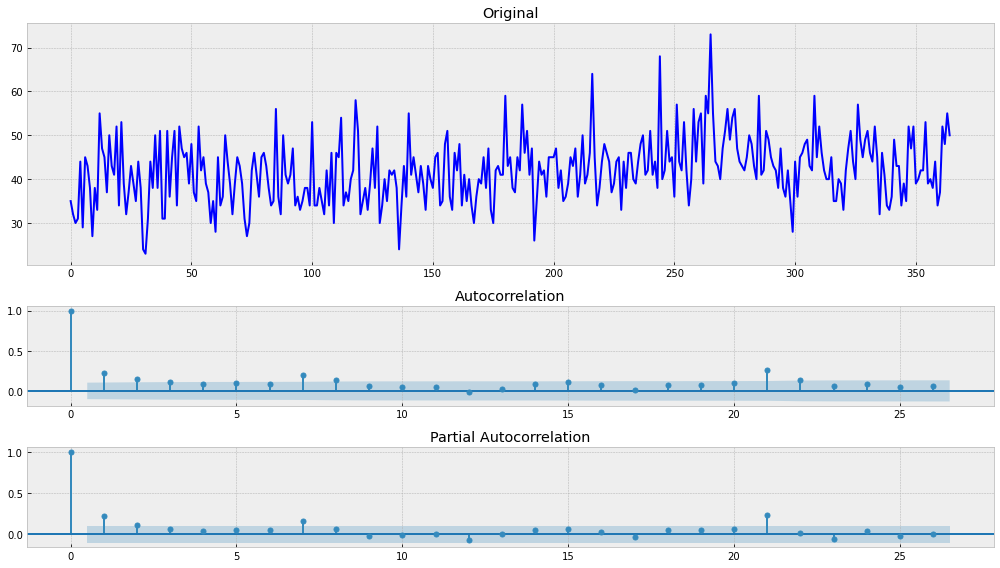

In [6]:
tsplot(births)

Ряд стационарный. Значение p-value меньше 5%

# Рассмотрим датасет international-airline-passengers

In [7]:
passengers = pd.read_csv('/Users/dubrov_arseniy/Desktop/Нетология/Data Scientist/Time series/1. Знакомство с временными рядами/1/Series/international-airline-passengers.csv')['Count']

In [8]:
passengers

0      112
1      118
2      132
3      129
4      121
      ... 
139    606
140    508
141    461
142    390
143    432
Name: Count, Length: 144, dtype: int64

Results of Dickey-Fuller Test:
Test Statistic                   0.815369
p-value                          0.991880
#Lags Used                      13.000000
Number of Observations Used    130.000000
Critical Value (1%)             -3.481682
Critical Value (5%)             -2.884042
Critical Value (10%)            -2.578770
dtype: float64


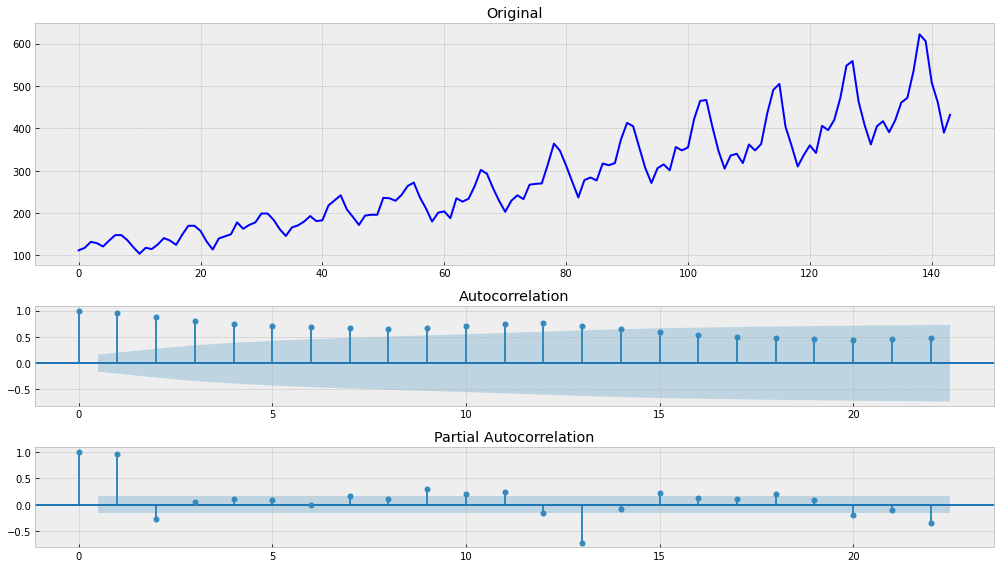

In [9]:
tsplot(passengers)

Ряд нестационарный. 
Как мы видим, и тест Дики-Фуллера и графики коррелограмм не отвергают гипотезу о нестационарности ряда. Для начала уберем изменение дисперсии при помощи преобразования Бокса-Кокса

In [10]:
#Применим преобразование Бокса-Кокса
passengers = boxcox(passengers, 0)

Results of Dickey-Fuller Test:
Test Statistic                  -1.717017
p-value                          0.422367
#Lags Used                      13.000000
Number of Observations Used    130.000000
Critical Value (1%)             -3.481682
Critical Value (5%)             -2.884042
Critical Value (10%)            -2.578770
dtype: float64


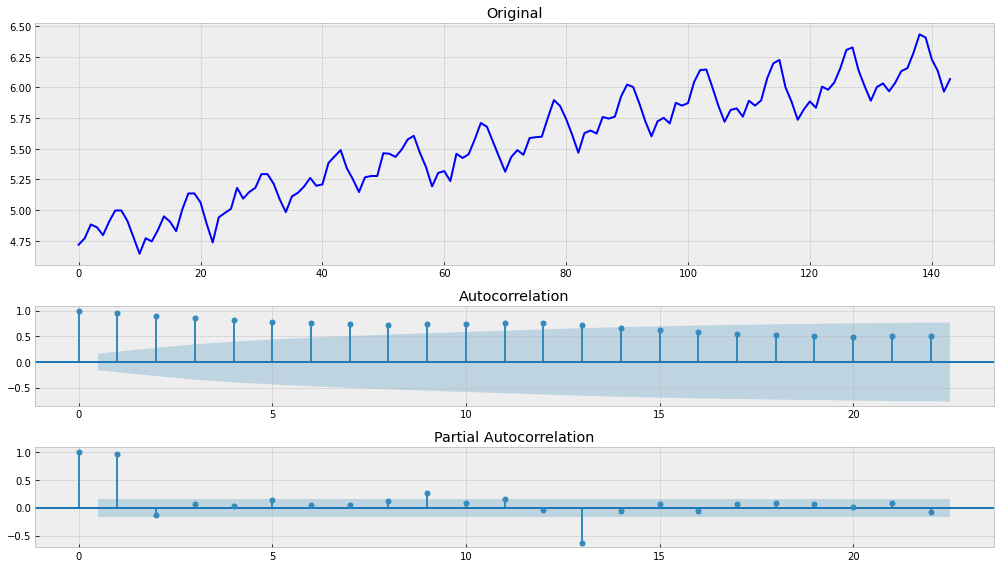

In [11]:
tsplot(passengers)

Нам удалось убрать размах дисперсии, но тест Дикки-Фуллера все еще не отвергает гипотезу о нестационарности ряда. По графику ряда видно наличие сильного тренда. Уберем его дифференцированием.

Results of Dickey-Fuller Test:
Test Statistic                  -2.717131
p-value                          0.071121
#Lags Used                      14.000000
Number of Observations Used    128.000000
Critical Value (1%)             -3.482501
Critical Value (5%)             -2.884398
Critical Value (10%)            -2.578960
dtype: float64


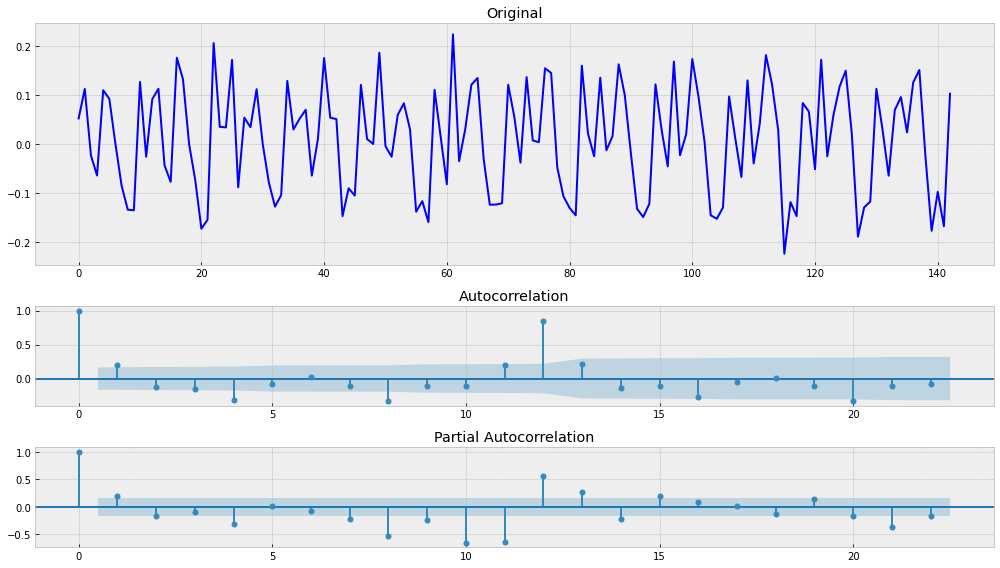

In [12]:
#Это  дифференцирование 1-го порядка 
passengers = passengers[1:] - passengers[:-1]
tsplot(passengers)

Стало еще лучше, но по графику коррелограммы видно сильное влияние сезонности. Уберем ее

Results of Dickey-Fuller Test:
Test Statistic                  -4.443325
p-value                          0.000249
#Lags Used                      12.000000
Number of Observations Used    118.000000
Critical Value (1%)             -3.487022
Critical Value (5%)             -2.886363
Critical Value (10%)            -2.580009
dtype: float64


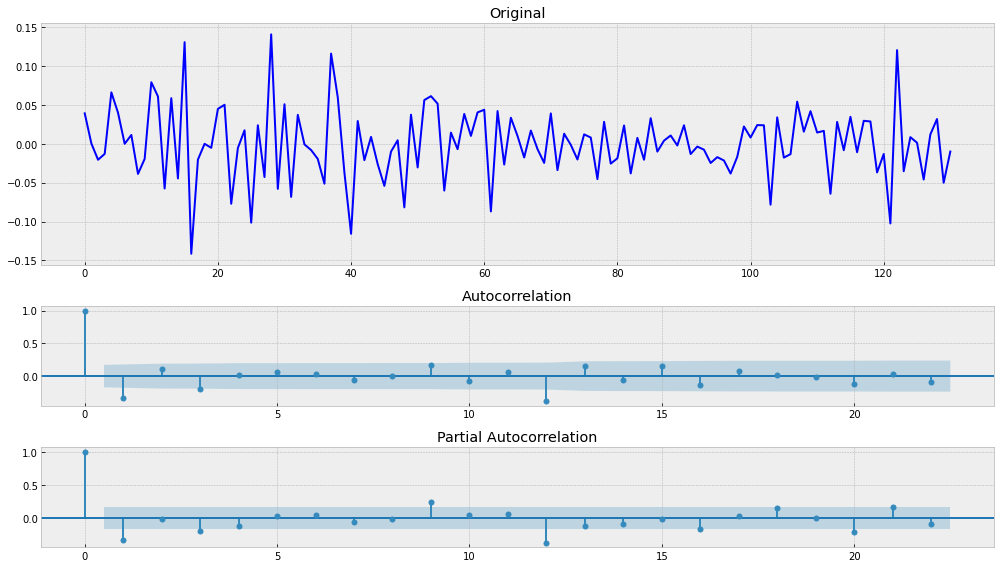

In [13]:

#Заглушаем сезонность 
passengers = passengers[12:] - passengers[:-12]
tsplot(passengers)

Теперь тест Дики-Фуллера и графики коррелограмм отвергают гипотезу о нестационарности ряда!

## Рассмотрим датасет mean-monthly-air-temperature-deg

In [41]:
temperature = pd.read_csv('/Users/dubrov_arseniy/Desktop/Нетология/Data Scientist/Time series/1. Знакомство с временными рядами/1/Series/mean-monthly-air-temperature-deg.csv')['Deg']

In [42]:
temperature

0      40.6
1      40.8
2      44.4
3      46.7
4      54.1
       ... 
235    61.8
236    58.2
237    46.7
238    46.6
239    37.8
Name: Deg, Length: 240, dtype: float64

Results of Dickey-Fuller Test:
Test Statistic                  -3.859318
p-value                          0.002356
#Lags Used                      15.000000
Number of Observations Used    224.000000
Critical Value (1%)             -3.459885
Critical Value (5%)             -2.874531
Critical Value (10%)            -2.573694
dtype: float64


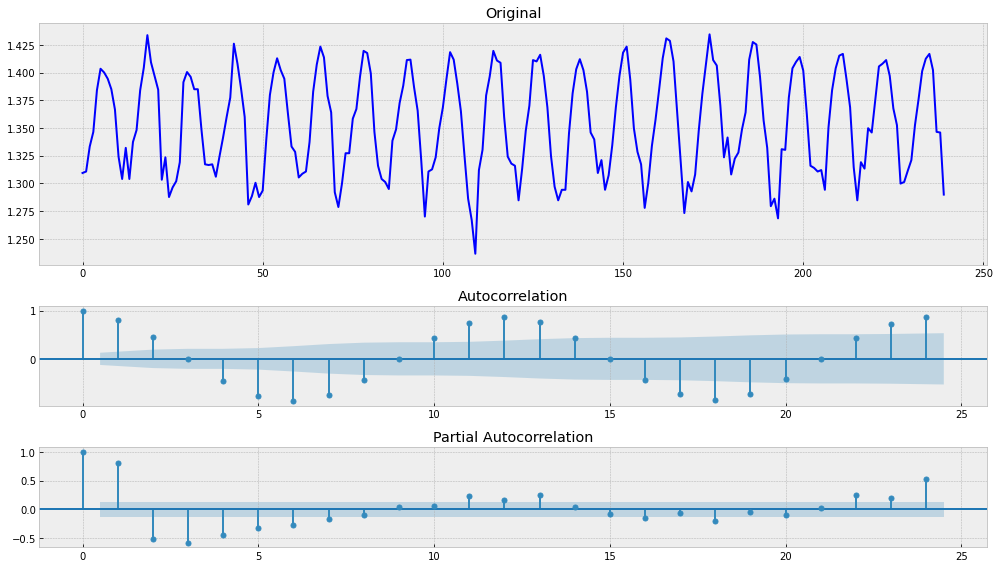

In [46]:
tsplot(temperature)

Results of Dickey-Fuller Test:
Test Statistic                  -3.859318
p-value                          0.002356
#Lags Used                      15.000000
Number of Observations Used    224.000000
Critical Value (1%)             -3.459885
Critical Value (5%)             -2.874531
Critical Value (10%)            -2.573694
dtype: float64


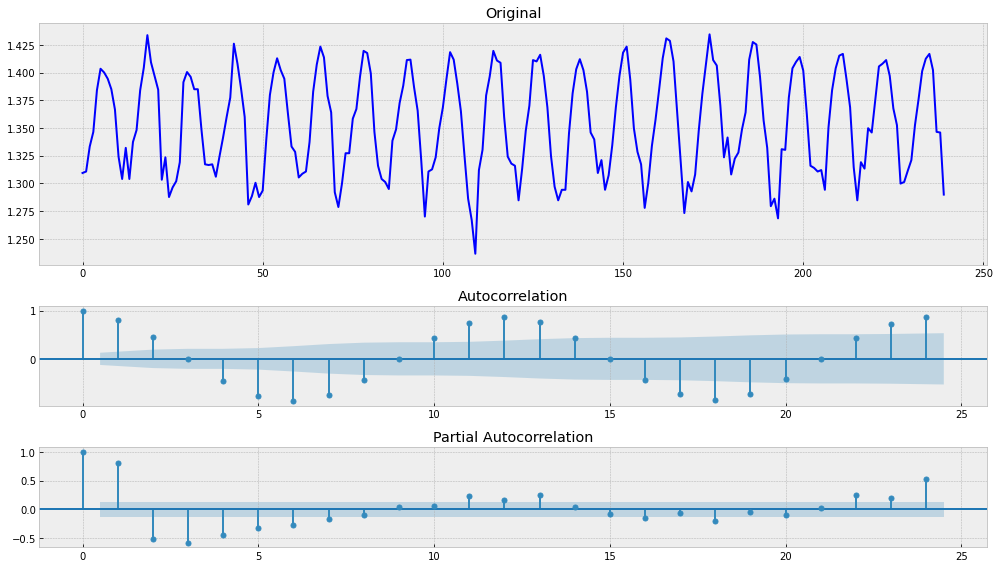

In [45]:

temperature = boxcox(temperature, 0)
tsplot(temperature)

Теперь тест Дики-Фуллера отвергают гипотезу о нестационарности ряда!

## Рассмотрим датасет monthly-boston-armed-robberies-j


In [49]:
boston = pd.read_csv('/Users/dubrov_arseniy/Desktop/Нетология/Data Scientist/Time series/1. Знакомство с временными рядами/1/Series/monthly-boston-armed-robberies-j.csv')['Count']

In [50]:
boston

0       41
1       39
2       50
3       40
4       43
      ... 
113    316
114    398
115    394
116    431
117    431
Name: Count, Length: 118, dtype: int64

Results of Dickey-Fuller Test:
Test Statistic                   1.001102
p-value                          0.994278
#Lags Used                      11.000000
Number of Observations Used    106.000000
Critical Value (1%)             -3.493602
Critical Value (5%)             -2.889217
Critical Value (10%)            -2.581533
dtype: float64


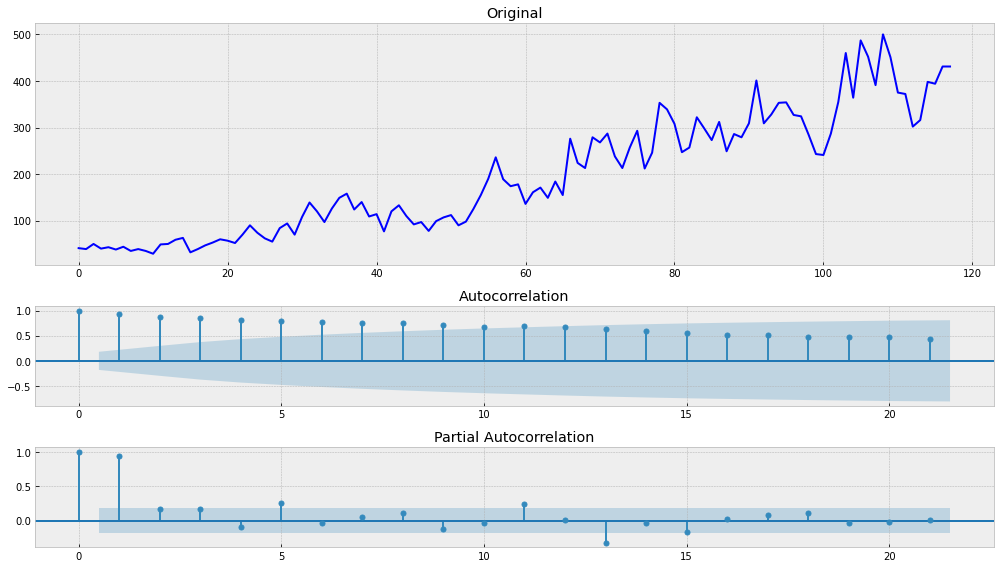

In [51]:
tsplot(boston)

Как мы видим, и тест Дики-Фуллера и графики коррелограмм не отвергают гипотезу о нестационарности ряда. Для начала уберем изменение дисперсии при помощи преобразования Бокса-Кокса

Results of Dickey-Fuller Test:
Test Statistic                  -2.013161
p-value                          0.280833
#Lags Used                      10.000000
Number of Observations Used    107.000000
Critical Value (1%)             -3.492996
Critical Value (5%)             -2.888955
Critical Value (10%)            -2.581393
dtype: float64


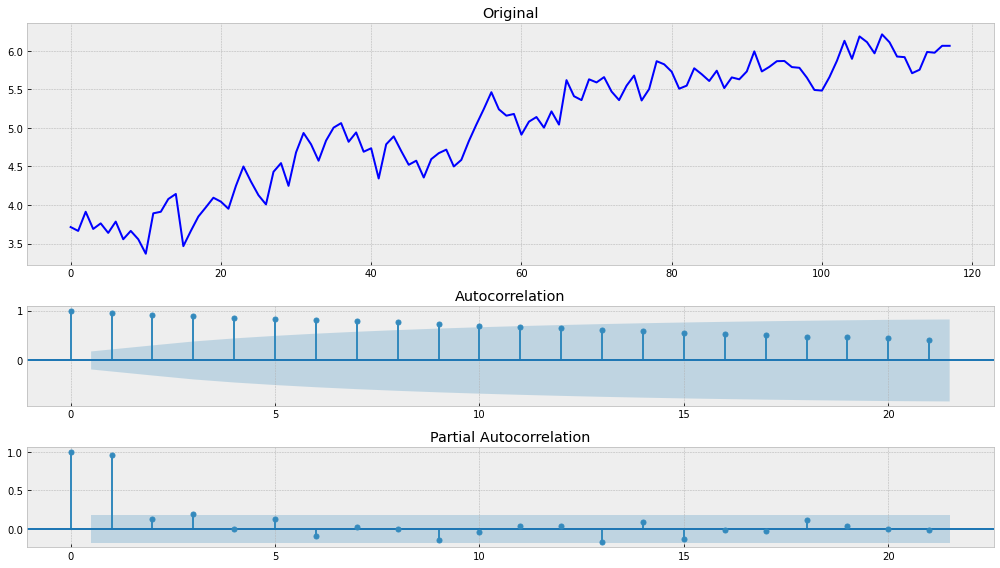

In [52]:
#Применим преобразование Бокса-Кокса
boston = boxcox(boston, 0)
tsplot(boston)

Нам удалось убрать размах дисперсии, но тест Дикки-Фуллера все еще не отвергает гипотезу о нестационарности ряда. По графику ряда видно наличие сильного тренда. Уберем его дифференцированием.

Results of Dickey-Fuller Test:
Test Statistic                -7.601792e+00
p-value                        2.378602e-11
#Lags Used                     3.000000e+00
Number of Observations Used    1.130000e+02
Critical Value (1%)           -3.489590e+00
Critical Value (5%)           -2.887477e+00
Critical Value (10%)          -2.580604e+00
dtype: float64


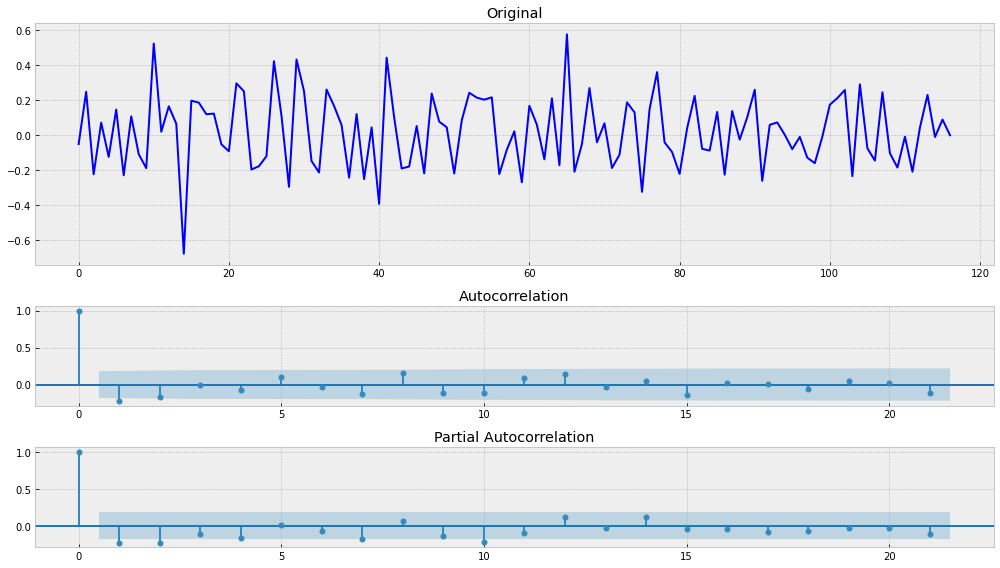

In [53]:
#Это  дифференцирование 1-го порядка 
boston = boston[1:] - boston[:-1]
tsplot(boston)

Results of Dickey-Fuller Test:
Test Statistic                 -4.232984
p-value                         0.000579
#Lags Used                     13.000000
Number of Observations Used    91.000000
Critical Value (1%)            -3.504343
Critical Value (5%)            -2.893866
Critical Value (10%)           -2.584015
dtype: float64


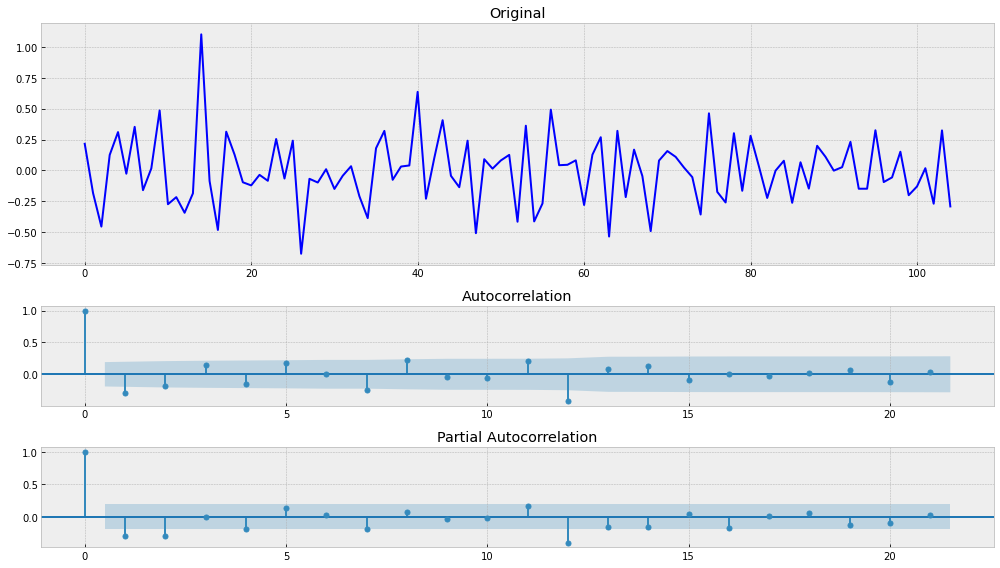

In [54]:
#Заглушаем сезонность 
boston = boston[12:] - boston[:-12]
tsplot(boston)

Теперь тест Дики-Фуллера и графики коррелограмм отвергают гипотезу о нестационарности ряда!

# Рассмотрим датасет monthly-sales-of-company-x-jan-6

In [159]:
sales = pd.read_csv('/Users/dubrov_arseniy/Desktop/Нетология/Data Scientist/Time series/1. Знакомство с временными рядами/1/Series/monthly-sales-of-company-x-jan-6.csv')['Count']

In [160]:
sales

0     154
1      96
2      73
3      49
4      36
     ... 
72    628
73    308
74    324
75    248
76    272
Name: Count, Length: 77, dtype: int64

Results of Dickey-Fuller Test:
Test Statistic                  0.654715
p-value                         0.988889
#Lags Used                     12.000000
Number of Observations Used    64.000000
Critical Value (1%)            -3.536928
Critical Value (5%)            -2.907887
Critical Value (10%)           -2.591493
dtype: float64


/opt/anaconda3/lib/python3.8/site-packages/statsmodels/regression/linear_model.py:1434: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


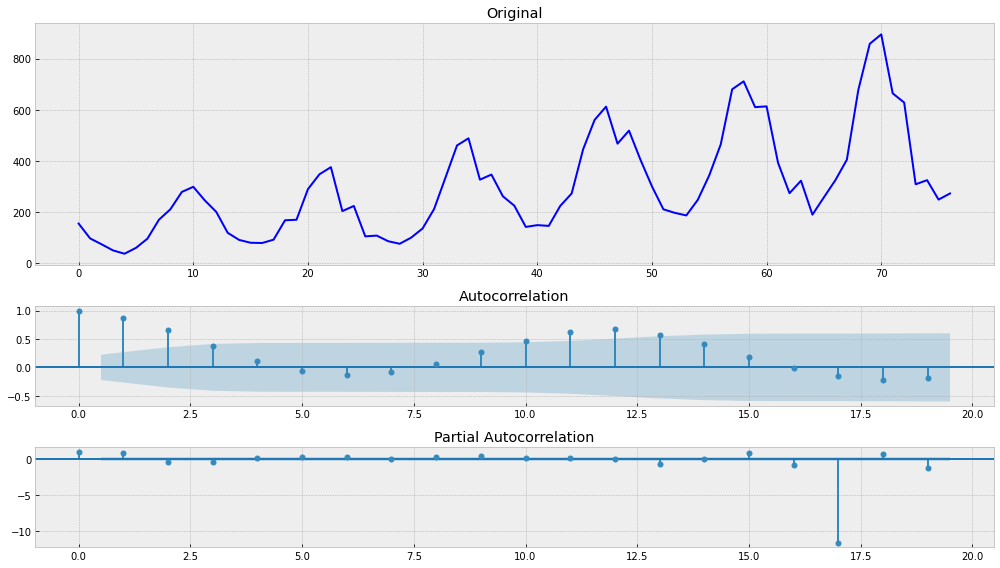

In [161]:
tsplot(sales)

Results of Dickey-Fuller Test:
Test Statistic                 -0.908049
p-value                         0.785310
#Lags Used                     12.000000
Number of Observations Used    64.000000
Critical Value (1%)            -3.536928
Critical Value (5%)            -2.907887
Critical Value (10%)           -2.591493
dtype: float64


/opt/anaconda3/lib/python3.8/site-packages/statsmodels/regression/linear_model.py:1434: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


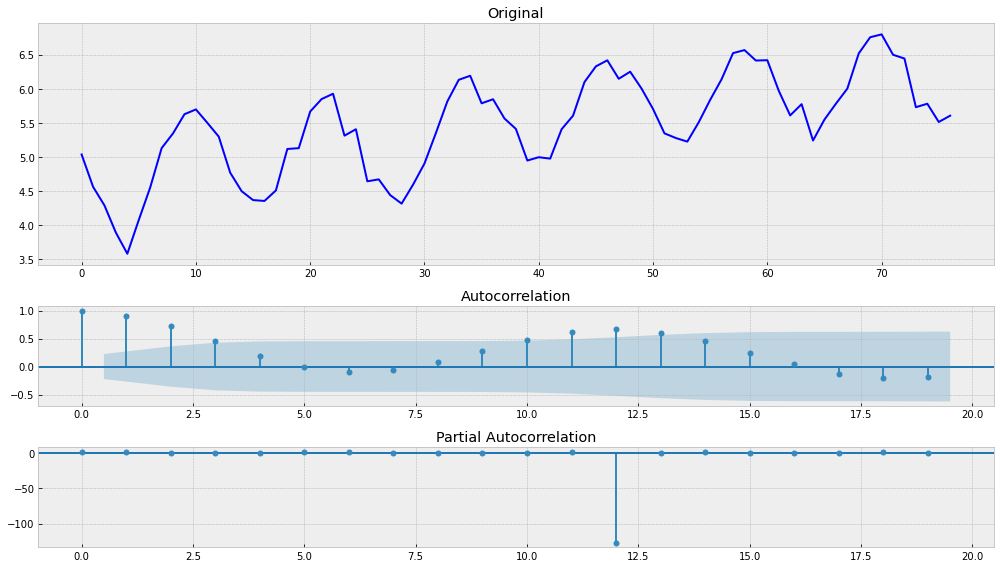

In [162]:
#Применим преобразование Бокса-Кокса
sales = boxcox(sales, 0)
tsplot(sales)

Results of Dickey-Fuller Test:
Test Statistic                 -3.502294
p-value                         0.007928
#Lags Used                     11.000000
Number of Observations Used    53.000000
Critical Value (1%)            -3.560242
Critical Value (5%)            -2.917850
Critical Value (10%)           -2.596796
dtype: float64


/opt/anaconda3/lib/python3.8/site-packages/statsmodels/regression/linear_model.py:1434: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


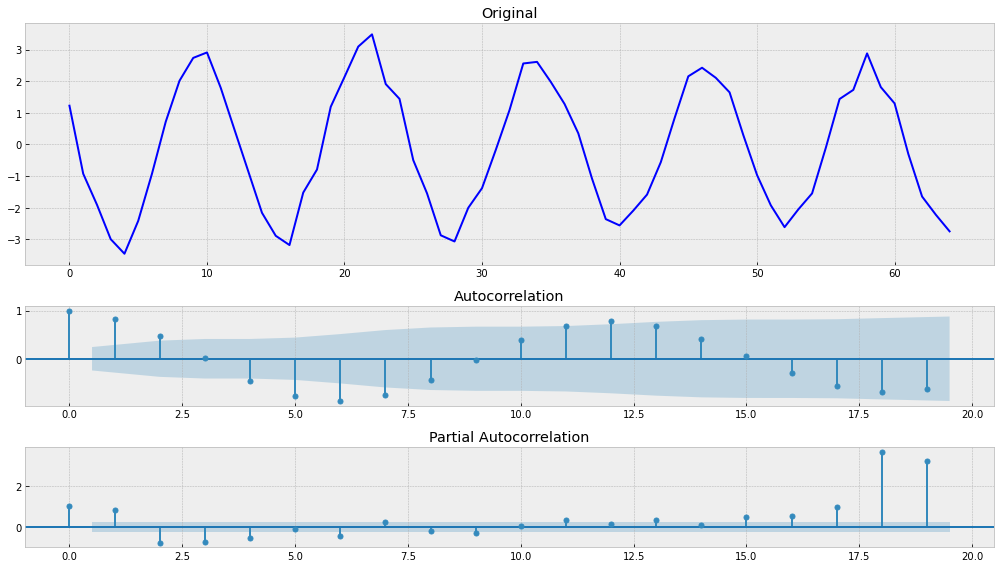

In [164]:
#Заглушаем сезонность 
sales = sales[6:] - sales[:-6]
tsplot(sales)

Теперь тест Дики-Фуллера и графики коррелограмм отвергают гипотезу о нестационарности ряда!

# Рассмотрим датасет weekly-closings-of-the-dowjones

In [141]:


dowjones = pd.read_csv('/Users/dubrov_arseniy/Desktop/Нетология/Data Scientist/Time series/1. Знакомство с временными рядами/1/Series/weekly-closings-of-the-dowjones-.csv')['Close']

In [142]:
dowjones

0      890.19
1      901.80
2      888.51
3      887.78
4      858.43
        ...  
157    791.77
158    787.23
159    787.94
160    784.57
161    752.58
Name: Close, Length: 162, dtype: float64

Results of Dickey-Fuller Test:
Test Statistic                  -1.314625
p-value                          0.622455
#Lags Used                       0.000000
Number of Observations Used    161.000000
Critical Value (1%)             -3.471633
Critical Value (5%)             -2.879665
Critical Value (10%)            -2.576434
dtype: float64


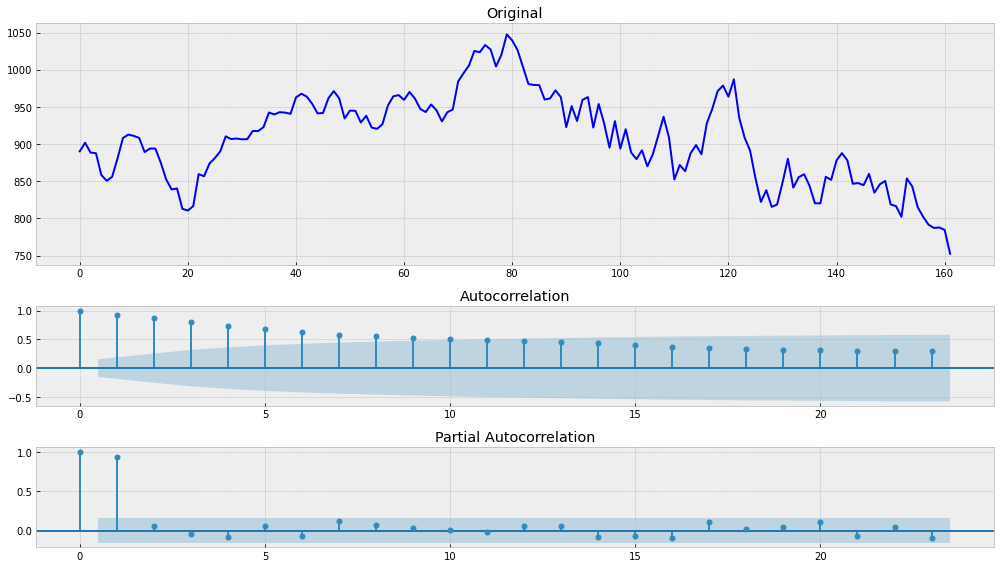

In [143]:
tsplot(dowjones)

Results of Dickey-Fuller Test:
Test Statistic                  -1.210369
p-value                          0.669119
#Lags Used                       0.000000
Number of Observations Used    161.000000
Critical Value (1%)             -3.471633
Critical Value (5%)             -2.879665
Critical Value (10%)            -2.576434
dtype: float64


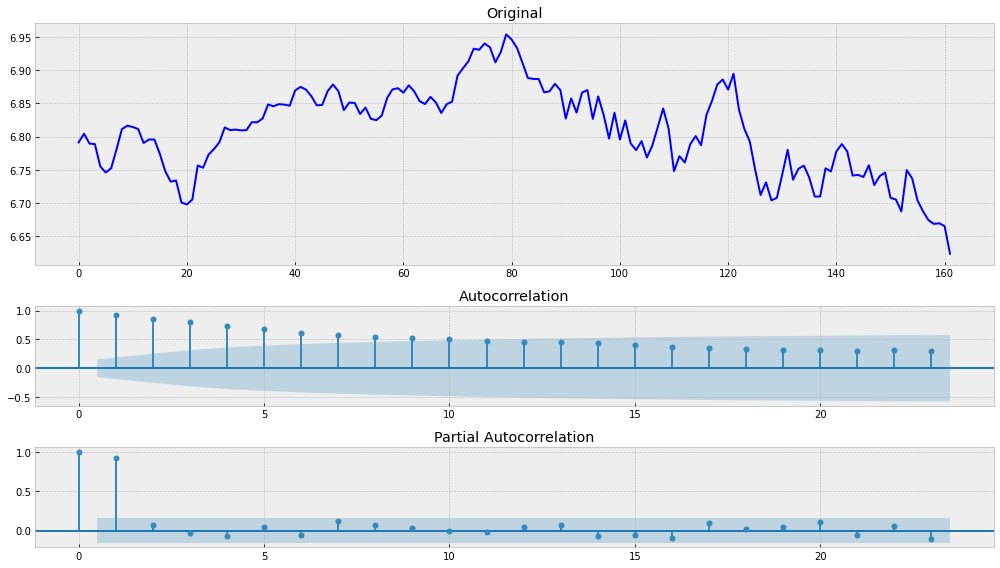

In [144]:
#Применим преобразование Бокса-Кокса
dowjones = boxcox(dowjones, 0)
tsplot(dowjones)

Results of Dickey-Fuller Test:
Test Statistic                  -3.640632
p-value                          0.005030
#Lags Used                      12.000000
Number of Observations Used    137.000000
Critical Value (1%)             -3.479007
Critical Value (5%)             -2.882878
Critical Value (10%)            -2.578149
dtype: float64


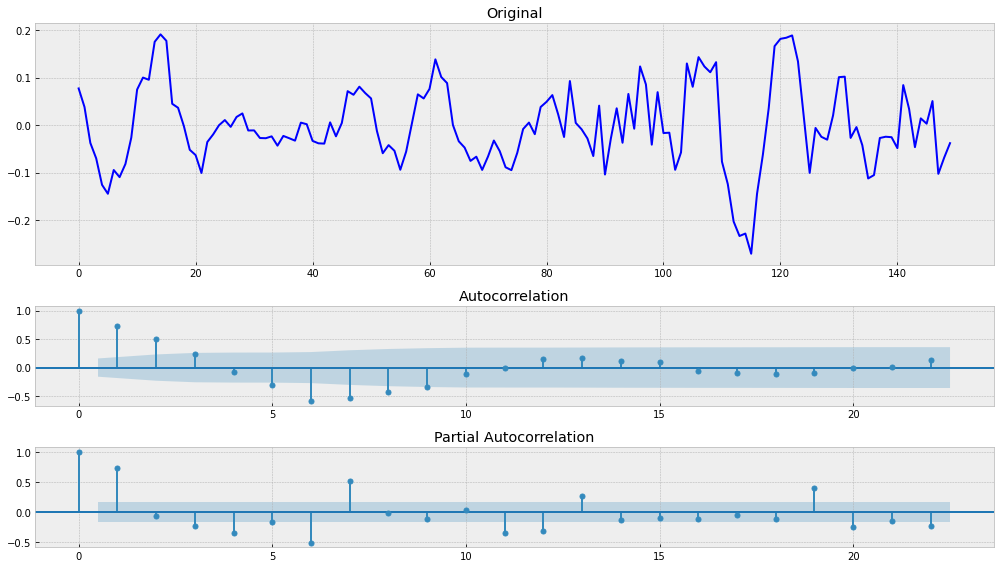

In [146]:
#Заглушаем сезонность 
dowjones = dowjones[6:] - dowjones[:-6]
tsplot(dowjones)